In [38]:
import pandas as pd
df_video = pd.read_csv("Data\TriedRefusedProductions_data.csv")
df_trans = pd.read_csv("Data\Tried and Refuse Production.csv")
df_video.columns , df_trans.columns

<>:2: SyntaxWarning: invalid escape sequence '\T'
<>:3: SyntaxWarning: invalid escape sequence '\T'
<>:2: SyntaxWarning: invalid escape sequence '\T'
<>:3: SyntaxWarning: invalid escape sequence '\T'
C:\Users\singh\AppData\Local\Temp\ipykernel_21864\2269905736.py:2: SyntaxWarning: invalid escape sequence '\T'
  df_video = pd.read_csv("Data\TriedRefusedProductions_data.csv")
C:\Users\singh\AppData\Local\Temp\ipykernel_21864\2269905736.py:3: SyntaxWarning: invalid escape sequence '\T'
  df_trans = pd.read_csv("Data\Tried and Refuse Production.csv")


(Index(['Unnamed: 0', 'videoId', 'title', 'description', 'thumbnail', 'addedAt',
        'viewCount', 'likeCount', 'commentCount'],
       dtype='object'),
 Index(['Unnamed: 0', 'video link', 'video code', 'video text', 'words spoken',
        'video length', 'video title', 'video views'],
       dtype='object'))

In [39]:
df_video.drop_duplicates(subset=['videoId'] , keep="first" , inplace= True)

In [40]:
df_video[df_video["videoId"] == '4vlmRcXdo1A']

,Unnamed: 0,videoId,title,description,thumbnail,addedAt,viewCount,likeCount,commentCount
1034,1034,4vlmRcXdo1A,Breathe: Into The Shadows Web Series Review & ...,#BreatheIntoTheShadows is here on #AmazonPrime...,https://i.ytimg.com/vi/4vlmRcXdo1A/sddefault.jpg,2020-07-10T09:25:25Z,218212.0,8246.0,1117.0


In [41]:
df_video.drop(columns=['Unnamed: 0' , 'title'] , inplace= True)
df_trans.drop(columns=['Unnamed: 0' , 'video views' ] , inplace= True)

In [42]:
df_trans.shape , df_video.shape

((1290, 6), (1592, 7))

In [43]:
df_trans = df_trans.merge(df_video , left_on='video code', right_on='videoId' , how='inner')
df_trans.shape

(1290, 13)

In [44]:
df_trans.sample(2)

,video link,video code,video text,words spoken,video length,video title,videoId,description,thumbnail,addedAt,viewCount,likeCount,commentCount
915,https://www.youtube.com/watch?v=vlrAc0td_7E,vlrAc0td_7E,amazing must feel because of my papa what does...,1915,615,10 Times Indian Celebrities Exposed The Double...,vlrAc0td_7E,The issue is not black and white but has a lot...,https://i.ytimg.com/vi/vlrAc0td_7E/sddefault.jpg,2020-06-23T09:19:47Z,967714.0,37347.0,1907.0
761,https://www.youtube.com/watch?v=4N2aWEviu6A,4N2aWEviu6A,[Music] it was the year 2014 and i was still i...,1629,500,TVF Aspirants Web Series Review & Analysis | I...,4N2aWEviu6A,#TVFAspirants the extremely popular web series...,https://i.ytimg.com/vi/4N2aWEviu6A/sddefault.jpg,2021-05-06T06:43:13Z,369276.0,21071.0,1449.0


### Preprocessing of text

In [45]:
from nltk import sent_tokenize , word_tokenize
import pandas as pd
import numpy as np


In [51]:
import string
import re

# Removing HTML
def remove_html_tag(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'' , text)

# [Music] --> remove
def remove_music_tags(text):
    pattern = re.compile('[.*?]')
    return pattern.sub(r'' , text)

# Remove emojis
def remove_emojis(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return emoji_pattern.sub(r'',text)

# Removing punctuation (!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~)
exclude = string.punctuation
def remove_pun(text):
    return text.translate(str.maketrans("" , "" , exclude))

def lower_text(text):
    return text.lower()


df_trans['video text'] = df_trans['video text'].apply(remove_html_tag)
df_trans['video text'] = df_trans['video text'].apply(remove_pun)
df_trans['video text'] = df_trans['video text'].apply(remove_music_tags)
df_trans['video text'] = df_trans['video text'].apply(remove_emojis)
df_trans['video text'] = df_trans['video text'].apply(lower_text)

In [62]:
import tqdm
vocab = set()

for vid_text in tqdm.tqdm(df_trans['video text'], desc="making vocab"):
    vocab.update(word_tokenize(vid_text))


making vocab: 100%|██████████| 1290/1290 [00:04<00:00, 273.14it/s]


In [ ]:
import json
import urllib3

API_HOST = "10.190.41.56"   
API_PORT = 8080

http = urllib3.PoolManager()

def give_result(query: str):
    try:
        payload = json.dumps({
            "query": query,
        })

        url = f"http://{API_HOST}:{API_PORT}/hierarchical_search"
        resp = http.request(
            "POST",
            url,
            body=payload,
            headers={
                "Content-Type": "application/json",
                "accept": "application/json"
            }
        )

        if resp.status != 200:
            return {
                "error": f"API returned status {resp.status}",
                "body": resp.data.decode("utf-8")
            }

        return json.loads(resp.data.decode("utf-8"))

    except Exception as e:
        return {"error": str(e)}

In [ ]:
import datetime
datetime.datetime.now()

datetime.datetime(2025, 9, 16, 16, 1, 50, 489742)

: 

In [ ]:
temp_list = list(vocab)

a = sorted(temp_list , key= lambda x: len(x) , reverse= True)
# largest_word = temp_list[0]
# for word in temp_list:
#     if len(word) > len(largest_word):
#         largest_word = word
        
print(a[:20]) #pseudohermaphrodite

['governmentcontrolled', 'astagfirullahaladzim', 'mujadukudsamajnayara', 'pseudohermaphrodite', 'performanceoriented', 'universityeducated', 'mentallychallenged', 'oversimplification', 'interconnectedness', 'conversationalists', 'bollywoodification', 'postliberalization', 'telecommunications', 'nonconfrontational', 'disenfranchisement', 'consumerismdriven', 'misrepresentation', 'counterproductive', 'unprofessionalism', 'institutionalized']


In [55]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\singh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [83]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(width = 600 , height = 600 , background_color = 'black' , min_font_size = 10 )

word_cloud = wc.generate(df_trans['video text'].str.cat(sep = ' '))

plt.show(word_cloud)

Matplotlib is building the font cache; this may take a moment.


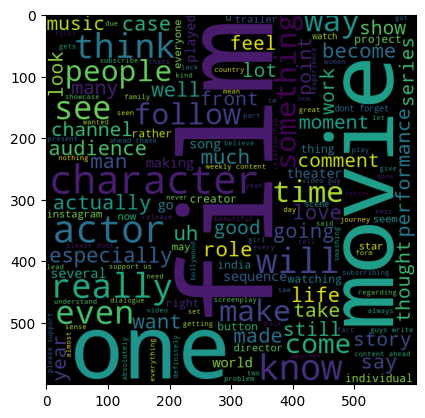

In [86]:
plt.imshow(word_cloud)

In [74]:
1600 * 12 

19200

8.333333333333334